In [7]:
# run this first if needed to get the rest of the imports right
import os
# os.chdir('../../')
os.chdir('/data/jeff-law/projects/fungcat/2019-11-fastsinksource')
os.getcwd()

'/data/jeff-law/projects/fungcat/2019-11-fastsinksource'

In [2]:
from collections import defaultdict
import argparse
import os, sys
from tqdm import tqdm
import itertools
#import utils.file_utils as utils
# also compute the significance of sinksource vs local
#from scipy.stats import kruskal, mannwhitneyu
# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
print("python version: %s" % (sys.version.split('\n')[0]))
print("matpltlib version: %s" % matplotlib.__version__)
print("seaborn version: %s" % sns.__version__)
print("pandas version: %s" % pd.__version__)
print("numpy version: %s" % (np.__version__))
# make this the default for now
sns.set_style('darkgrid')
# my local imports
# fss_dir = os.path.dirname(os.path.dirname(os.path.dirname(__file__)))
# sys.path.insert(0,fss_dir)
from FastSinkSource.src.plot import plot_utils
from FastSinkSource.src.algorithms import runner

python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
matpltlib version: 3.1.3
seaborn version: 0.9.0
pandas version: 0.23.0
numpy version: 1.17.2


In [3]:
def load_results(config_files):
    full_config_map = None
    df_all = pd.DataFrame()
    kwargs = {}
    for param, config_file in config_files.items():
        print(param)
        config_map = plot_utils.load_config_file(config_file)
        full_config_map = config_map if full_config_map is None else full_config_map
        full_config_map['algs']['birgrank'][param] = config_map['algs']['birgrank'][param]

        # load the results for this set of params
        input_settings, alg_settings, output_settings, out_pref, kwargs = plot_utils.setup_variables(
            config_map, '', **kwargs)
        # keep only the most specific terms
        kwargs['most_specific_terms'] = True
        kwargs['most-specific-terms'] = True
        # load the fmax values
        df = plot_utils.load_all_results(input_settings, alg_settings, output_settings, **kwargs)
        df['exp_label'] = kwargs['exp_label']
    #     print(len(df.index), len(config_map['algs']['birgrank'][param]))
    #     if param == 'alpha':
    #         df['param_val'] = 
        df_all = pd.concat([df_all, df])


    # print(full_config_map)
    plot_utils.results_overview(df_all)
    return df_all, out_pref

In [10]:
config_dir = "config-files/sp27-plot/params/birgrank-noprop/"
config_files = {
    'alpha': "%s/vary-alpha.yaml" % (config_dir),
    'lambda': "%s/vary-lambda.yaml" % (config_dir),
    'mu': "%s/vary-mu.yaml" % (config_dir),
}
# load the first set of results, then the next set of results
df1, out_pref = load_results(config_files)
config_files = {
    'alpha': "%s/vary-alpha-l0_1.yaml" % (config_dir),
    'lambda': "%s/vary-lambda-a0_9.yaml" % (config_dir),
    'mu': "%s/vary-mu-a0_9.yaml" % (config_dir),
#     'mu': "%s/vary-mu-a0_95-l0_01.yaml" % (config_dir),
}
df2, out_pref = load_results(config_files)

alpha
Reading GO dags from inputs/goa/2019_10/2019-10-15-go-isa-edgelist.txt
	DAG for C has 4183 nodes, 4732 edges
	DAG for F has 11093 nodes, 13557 edges
	DAG for P has 29457 nodes, 56872 edges
9 combinations for birgrank
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-sp27/expc-bp-Yneg/birgrank/loso-swsn-noprop-a0_01-t0_5-m0_5-l0_5-eps1e-04-maxi1000.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-sp27/expc-bp-Yneg/birgrank/loso-swsn-noprop-a0_05-t0_5-m0_5-l0_5-eps1e-04-maxi1000.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-sp27/expc-bp-Yneg/birgrank/loso-swsn-noprop-a0_1-t0_5-m0_5-l0_5-eps1e-04-maxi1000.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-sp27/expc-bp-Yneg/birgrank/loso-swsn-noprop-a0_25-t0_5-m0_5-l0_5-eps1e-04-maxi1000.txt
	reading outputs//net-versions/2019_10-sp200-eval-e0_1-stringv11-700/net-exp-sp27/expc-bp-Yneg/birgrank/loso-swsn-noprop-a

In [5]:
def plot_param_results(df, measure='fmax', ax=None):
    ax = sns.pointplot(x='Algorithm', y=measure, data=df, ax=ax,
                  hue='exp_label', markers=['P','^','o'],
                  estimator=np.median, ci=None,
                  palette="colorblind", saturation=0.8
                    )
    ax.set_xlabel("Parameter Value", fontsize=12, fontweight='bold')
    plt.setp(ax.lines,linewidth=1)  # set lw for all lines of g axes
    # remove the legend title
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:], labels=labels[:])
    return ax

outputs/viz/params/birgrank-mu2.pdf


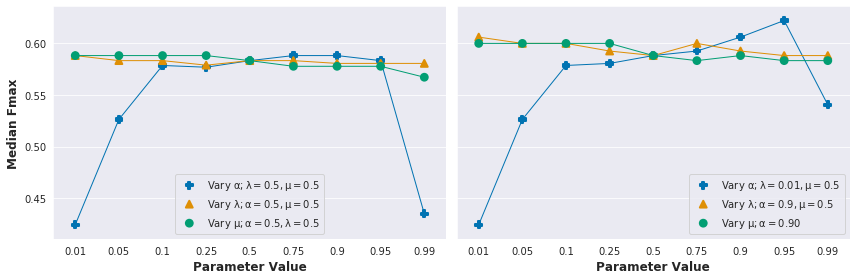

In [12]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))

plot_param_results(df1, ax=ax1)
plot_param_results(df2, ax=ax2)
ax1.set_ylabel("Median Fmax", fontsize=12, fontweight='bold')
ax2.set_ylabel("")

plt.tight_layout()

out_file = "outputs/viz/params/birgrank-mu2.pdf"
os.makedirs(os.path.dirname(out_file), exist_ok=True)
print(out_file)
plt.savefig(out_file)
plt.show()
plt.close()

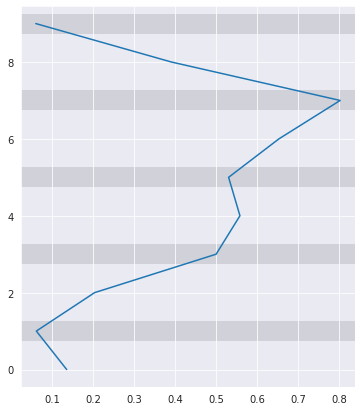

In [97]:
x = np.random.random(10)
# y = np.random.random(10)
y = np.arange(10)
f, ax = plt.subplots(figsize=(6,7))
for i in range(len(y)):
    if i % 2:
        ax.axhline(i, linewidth=20, color=c2, zorder=0)
    
ax.plot(x, y)
# alternate these colors
c1, c2 = "#eaeaf2", "#d1d1d9"
table_colors = []

#         ax.axhline(i, color=c1)
#         table_colors.append([c1])
# ax.table(cellColours=table_colors,edges='RL') #edges='horizontal')
# plt.